In [4]:
import pandas as pd

In [5]:
# we can set numbers for how many rows and columns will be displayed
pd.set_option('display.min_rows', 10) #default will be 10
pd.set_option('display.max_columns', 20)

In [6]:
# read csv file
df = pd.read_csv('online_store_customer_data.csv')
df.head(3)

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60


# 1. Data Description

In [7]:
# •	Find out the number of rows and columns in your data frame by using function shape
print("Data Shape: ", df.shape)
print("Rows in Data: ", df.shape[0])
print("Columns in Data: ", df.shape[1])

Data Shape:  (2512, 11)
Rows in Data:  2512
Columns in Data:  11


In [8]:
# •	Display the statistical summary of your data frame by using describe() function.
df.describe()

,Transaction_ID,Age,Referal,Amount_spent
count,2512.000000,2470.000000,2357.000000,2270.000000
mean,152443.931131,46.637652,0.652100,1418.422577
std,724.580482,18.186277,0.476405,878.507451
min,151200.000000,15.000000,0.000000,2.090000
25%,151815.750000,32.000000,0.000000,678.192500
50%,152443.500000,47.000000,1.000000,1341.435000
75%,153071.250000,62.000000,1.000000,2038.102500
max,153699.000000,78.000000,1.000000,2999.980000


In [9]:
# •	Use function info to find out columns, their data types, and number of non-null values in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2512 non-null   object 
 1   Transaction_ID    2512 non-null   int64  
 2   Gender            2484 non-null   object 
 3   Age               2470 non-null   float64
 4   Marital_status    2512 non-null   object 
 5   State_names       2512 non-null   object 
 6   Segment           2512 non-null   object 
 7   Employees_status  2486 non-null   object 
 8   Payment_method    2512 non-null   object 
 9   Referal           2357 non-null   float64
 10  Amount_spent      2270 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 216.0+ KB


In [10]:
# •	Use function value_counts() to find out unique values and their frequency in columns Gender, Marital_status, and Payement_method.
print(df['Gender'].value_counts())
print(df['Marital_status'].value_counts())
print(df['Payment_method'].value_counts())

Gender
Female    1356
Male      1128
Name: count, dtype: int64
Marital_status
Married    1473
Single     1039
Name: count, dtype: int64
Payment_method
PayPal    1168
Card       749
Other      595
Name: count, dtype: int64


# 2. Missing Values

In [11]:
df.isna().sum()

Transaction_date      0
Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             155
Amount_spent        242
dtype: int64

In [12]:
df.isnull().sum()

Transaction_date      0
Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             155
Amount_spent        242
dtype: int64

# Task 3

In [13]:
# Drop column Transaction_date from main dataframe
df.drop(columns = 'Transaction_date', inplace=True)

In [14]:
# Drop column “Amount_spent” using df.drop(‘column name’, inplace=True)
df_temp = df.copy()
df_temp.drop(columns=['Amount_spent'], inplace=True)
df_temp.head(3)

,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal
0,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0
1,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0
2,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0


In [15]:
print(df_temp.isnull().sum())

Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             155
dtype: int64


In [16]:
# Remove rows from data frame where Employee_status values are missing.

df_temp.dropna(subset = ["Employees_status"], inplace=True)
df_temp.isnull().sum()

Transaction_ID        0
Gender               27
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status      0
Payment_method        0
Referal             154
dtype: int64

In [17]:
# Replace Amount_spent missing values with the mean value of amount_spent.
mean_AS = df['Amount_spent'].mean()
df['Amount_spent'].fillna(mean_AS, inplace=True)
df.isnull().sum()

/var/folders/yl/hc0wg3cd5577fyq8rq7spkx00000gn/T/ipykernel_74052/282788926.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount_spent'].fillna(mean_AS, inplace=True)


Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             155
Amount_spent          0
dtype: int64

In [18]:
# Replace missing values in Age with the mean age value.
mean_Age = df['Age'].mean()
df['Age'].fillna(mean_Age, inplace=True)
df.isnull().sum()

/var/folders/yl/hc0wg3cd5577fyq8rq7spkx00000gn/T/ipykernel_74052/87484663.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean_Age, inplace=True)


Transaction_ID        0
Gender               28
Age                   0
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             155
Amount_spent          0
dtype: int64

In [19]:
# Replace missing values in Referal with the mean Referal value.
mean_R = df['Referal'].mean()
df['Referal'].fillna(mean_R, inplace=True)
df.isnull().sum()

/var/folders/yl/hc0wg3cd5577fyq8rq7spkx00000gn/T/ipykernel_74052/2169838137.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Referal'].fillna(mean_R, inplace=True)


Transaction_ID       0
Gender              28
Age                  0
Marital_status       0
State_names          0
Segment              0
Employees_status    26
Payment_method       0
Referal              0
Amount_spent         0
dtype: int64

In [20]:
# Replace missing values in “Employee_status” with the mode value of column “Employee_status”.
mode_emp = df['Employees_status'].mode().iloc[0]
df['Employees_status'].fillna(mode_emp, inplace=True)
df.isnull().sum()

/var/folders/yl/hc0wg3cd5577fyq8rq7spkx00000gn/T/ipykernel_74052/1150892309.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employees_status'].fillna(mode_emp, inplace=True)


Transaction_ID       0
Gender              28
Age                  0
Marital_status       0
State_names          0
Segment              0
Employees_status     0
Payment_method       0
Referal              0
Amount_spent         0
dtype: int64

In [21]:
# Replace missing values in Gender with the mode value of column Gender.
mode_Gender = df['Gender'].mode().iloc[0]
df['Gender'].fillna(mode_Gender, inplace=True)
df.isnull().sum()

/var/folders/yl/hc0wg3cd5577fyq8rq7spkx00000gn/T/ipykernel_74052/2346130288.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(mode_Gender, inplace=True)


Transaction_ID      0
Gender              0
Age                 0
Marital_status      0
State_names         0
Segment             0
Employees_status    0
Payment_method      0
Referal             0
Amount_spent        0
dtype: int64

# 3. Inconsistant Data

In [22]:
df.columns

Index(['Transaction_ID', 'Gender', 'Age', 'Marital_status', 'State_names',
       'Segment', 'Employees_status', 'Payment_method', 'Referal',
       'Amount_spent'],
      dtype='object')

In [23]:
#unique values in Payement method
print(df['Payment_method'].value_counts())

Payment_method
PayPal    1168
Card       749
Other      595
Name: count, dtype: int64


In [24]:
#unique values in Employees_status
print(df['Employees_status'].value_counts())

Employees_status
Employees        972
workers          798
self-employed    487
Unemployment     255
Name: count, dtype: int64


In [25]:
# rows where Employees_status is unemployment and Payement_method is other
df[(df['Employees_status']=='Unemployment') & (df['Payment_method']=='Other')].index

Index([   0,   38,   72,  102,  105,  109,  112,  127,  131,  168,  178,  202,
        245,  282,  326,  352,  406,  416,  556,  642,  654,  655,  724,  893,
        930,  931,  945,  994, 1023, 1089, 1107, 1149, 1241, 1252, 1312, 1324,
       1330, 1348, 1493, 1506, 1567, 1588, 1589, 1615, 1616, 1653, 1726, 1803,
       1838, 1867, 2004, 2021, 2086, 2120, 2228, 2287, 2323, 2371],
      dtype='int64')

In [26]:
# Drop rows where Employees_status is unemployment and Payement_method is other
print('Data shape before droping rows', df.shape)

df = df.drop(df[(df['Employees_status']=='Unemployment') & (df['Payment_method']=='Other')].index)

print('Data shape after droping rows', df.shape)

Data shape before droping rows (2512, 10)
Data shape after droping rows (2454, 10)


# Exploratory Data Analysis
## 1.1 Line Graph

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2454 entries, 1 to 2511
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    2454 non-null   int64  
 1   Gender            2454 non-null   object 
 2   Age               2454 non-null   float64
 3   Marital_status    2454 non-null   object 
 4   State_names       2454 non-null   object 
 5   Segment           2454 non-null   object 
 6   Employees_status  2454 non-null   object 
 7   Payment_method    2454 non-null   object 
 8   Referal           2454 non-null   float64
 9   Amount_spent      2454 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 210.9+ KB


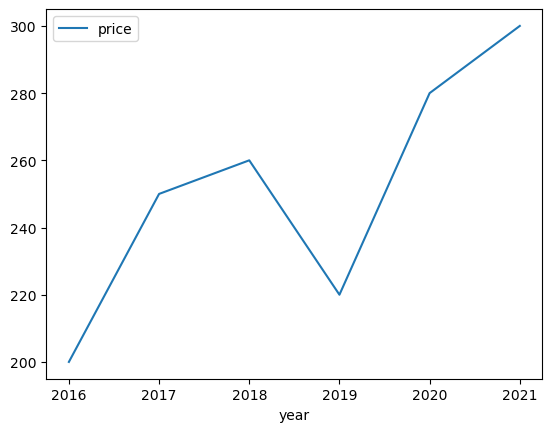

In [28]:
dict_line = {
    'year': [2016, 2017, 2018, 2019, 2020, 2021],
    'price': [200, 250, 260, 220, 280, 300]
}

df_line = pd.DataFrame(dict_line)

# use plot() method on the dataframe
df_line.plot('year', 'price');

                count
Payment_method       
PayPal           1168
Card              749
Other             537
  Payment_method  Count
0         PayPal   1168
1           Card    749
2          Other    537


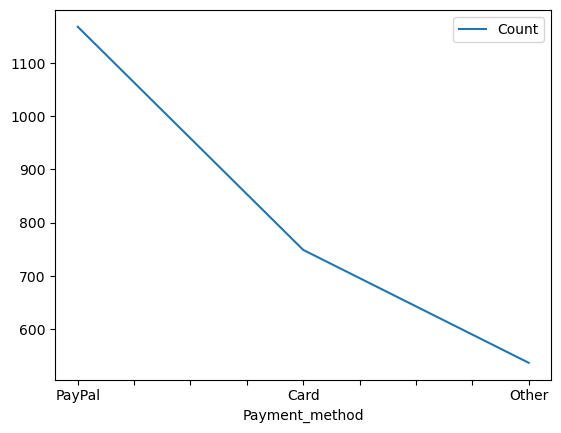

In [29]:
payement_df = pd.DataFrame(df[['Payment_method']].value_counts())
print(payement_df)
payement_df = payement_df.reset_index()
payement_df.columns = ['Payment_method', 'Count']
print(payement_df)

# fig
payement_df.plot('Payment_method', 'Count', kind='line');
#plot = cancel_df.plot.pie(y='count', figsize=(5, 5), legend=True, title='% of cancelation')

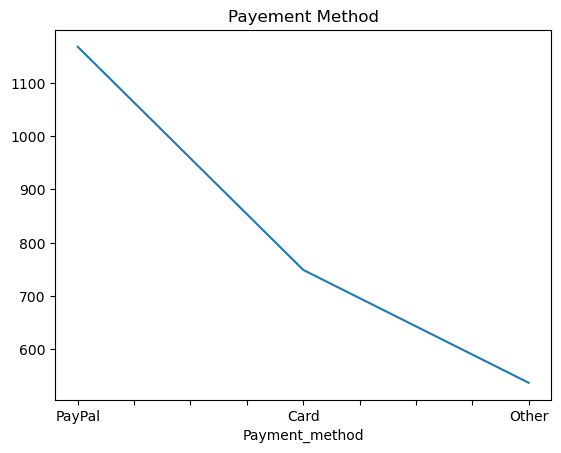

In [30]:
df['Payment_method'].value_counts().plot(kind='line', title="Payement Method");

In [31]:
states = df['State_names'].unique()
states

array(['Illinois', 'New Mexico', 'Virginia', 'Connecticut', 'Hawaii',
       'Florida', 'Vermont', 'California', 'Colorado', 'Iowa',
       'South Carolina', 'New York', 'Maine', 'Maryland', 'Missouri',
       'North Dakota', 'Ohio', 'Nebraska', 'Montana', 'Indiana',
       'Wisconsin', 'Alabama', 'Arkansas', 'Pennsylvania',
       'New Hampshire', 'Washington', 'Texas', 'Kentucky',
       'Massachusetts', 'Wyoming', 'Louisiana', 'North Carolina',
       'Rhode Island', 'West Virginia', 'Kansas', 'Tennessee', 'Oregon',
       'Alaska', 'Oklahoma', 'Nevada', 'New Jersey', 'Michigan',
       'Arizona', 'Utah', 'Georgia', 'Idaho', 'Minnesota', 'Mississippi',
       'Delaware', 'South Dakota'], dtype=object)

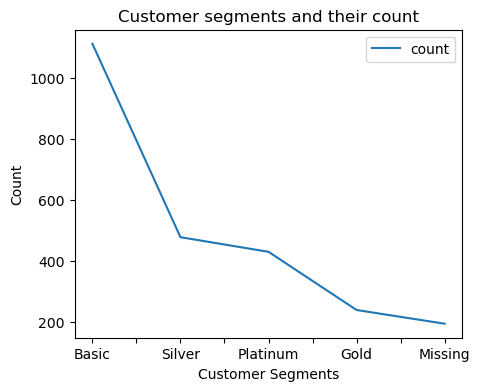

In [32]:


df['Segment'].value_counts().plot(kind='line', title="Customer segments and their count", figsize=[5,4], ylabel="Count", xlabel="Customer Segments", legend=True);

## 1.2 Bar plot

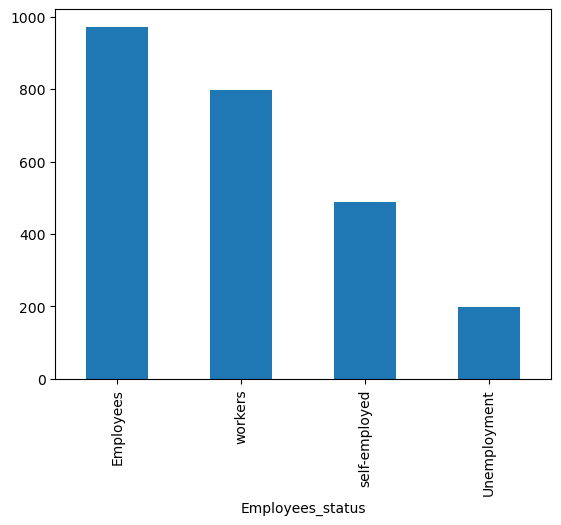

In [33]:
df['Employees_status'].value_counts().plot(kind='bar');

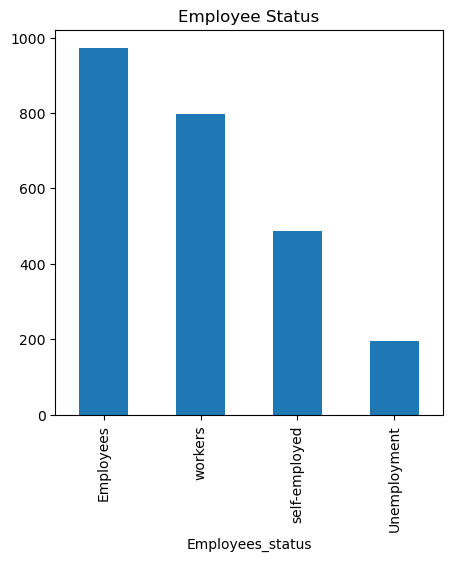

In [34]:
df['Employees_status'].value_counts().plot(kind='bar', title="Employee Status", figsize= [5,5]);

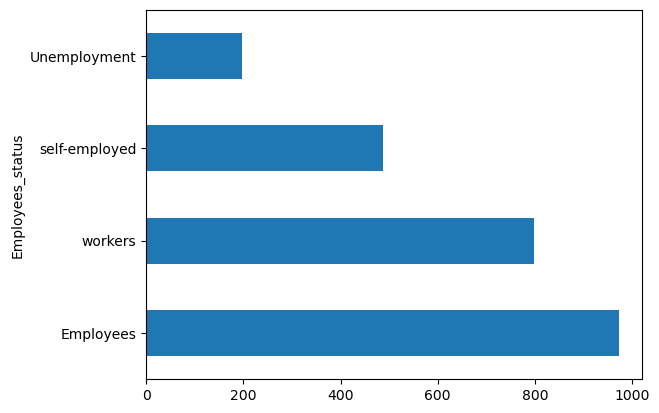

In [35]:
df['Employees_status'].value_counts().plot(kind='barh');

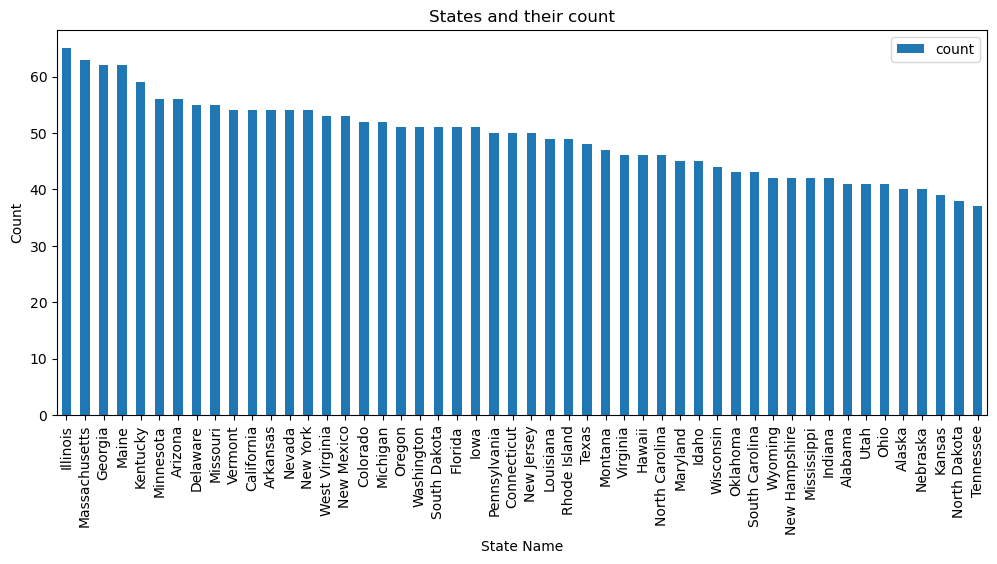

In [36]:


df['State_names'].value_counts().plot(kind='bar', title="States and their count", figsize=[12,5], ylabel="Count", xlabel="State Name", legend=True);

## 1.3 Pie Plot

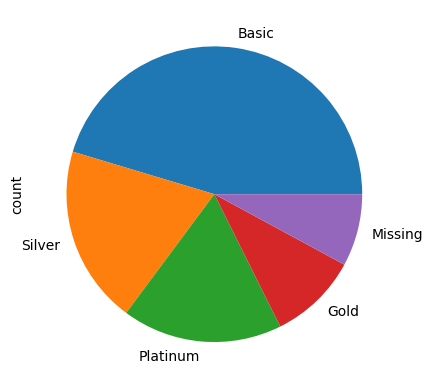

In [37]:
df['Segment'].value_counts().plot(kind='pie');

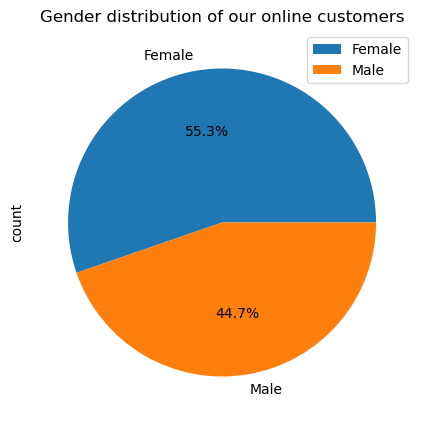

In [38]:


df['Gender'].value_counts().plot(kind='pie', title="Gender distribution of our online customers",autopct='%1.1f%%', figsize=[12,5], legend=True);

### 1.4 Histogram

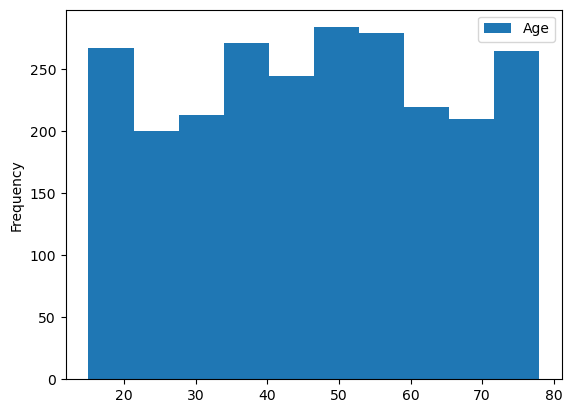

In [39]:
df.plot( y='Age', kind='hist', bins=10);


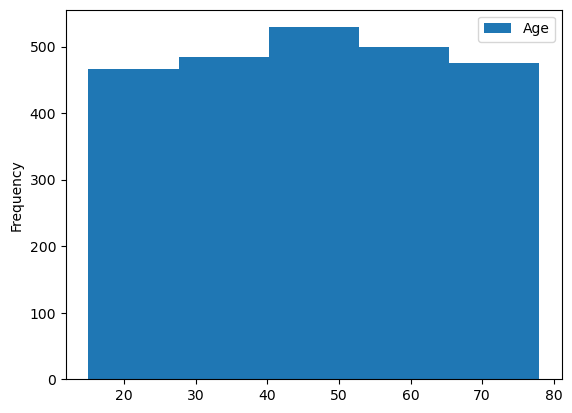

In [40]:
df.plot( y='Age', kind='hist', bins=5);

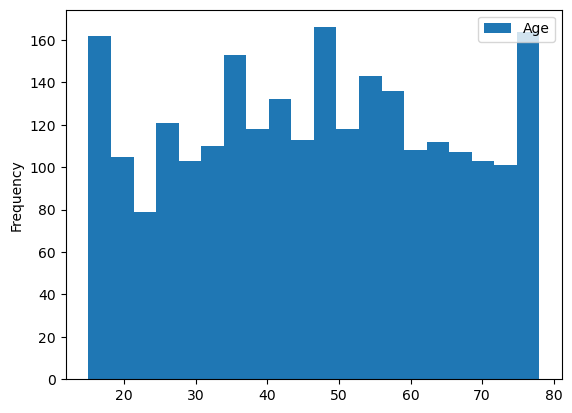

In [41]:
df.plot( y='Age', kind='hist', bins=20);

## 1.5 Box Plot

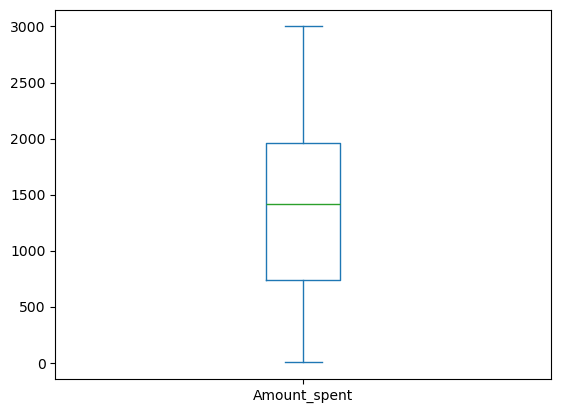

In [42]:
df.plot(y=['Amount_spent'], kind='box');

In [43]:
df.head()

,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
1,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.040000
2,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.600000
3,151203,Female,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.790000
4,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,1418.422577
5,151205,Male,71.0,Single,Hawaii,Basic,Employees,PayPal,1.0,2922.660000


In [44]:
df = df._append({'Transaction_ID': 160000, 'Gender': 'Male','Age': 40, 'Marital_status': 'Married','State_names': 'Hawaii', 'Segment': 'Basic','Employees_status': 'workers', 'Payment_method': 'PayPal','Referal': 1.0, 'Amount_spent': 4000}, ignore_index=True)
df = df._append({'Transaction_ID': 160001, 'Gender': 'Male','Age': 40, 'Marital_status': 'Married','State_names': 'Hawaii', 'Segment': 'Basic','Employees_status': 'workers', 'Payment_method': 'PayPal','Referal': 1.0, 'Amount_spent': 5000}, ignore_index=True)
df = df._append({'Transaction_ID': 160002, 'Gender': 'Male','Age': 40, 'Marital_status': 'Married','State_names': 'Hawaii', 'Segment': 'Basic','Employees_status': 'workers', 'Payment_method': 'PayPal','Referal': 1.0, 'Amount_spent': 6000}, ignore_index=True)
df = df._append({'Transaction_ID': 160003, 'Gender': 'Male','Age': 40, 'Marital_status': 'Married','State_names': 'Hawaii', 'Segment': 'Basic','Employees_status': 'workers', 'Payment_method': 'PayPal','Referal': 1.0, 'Amount_spent': 7000}, ignore_index=True)
df = df._append({'Transaction_ID': 160004, 'Gender': 'Male','Age': 40, 'Marital_status': 'Married','State_names': 'Hawaii', 'Segment': 'Basic','Employees_status': 'workers', 'Payment_method': 'PayPal','Referal': 1.0, 'Amount_spent': 8000}, ignore_index=True)
df = df._append({'Transaction_ID': 160005, 'Gender': 'Male','Age': 40, 'Marital_status': 'Married','State_names': 'Hawaii', 'Segment': 'Basic','Employees_status': 'workers', 'Payment_method': 'PayPal','Referal': 1.0, 'Amount_spent': 9000}, ignore_index=True)



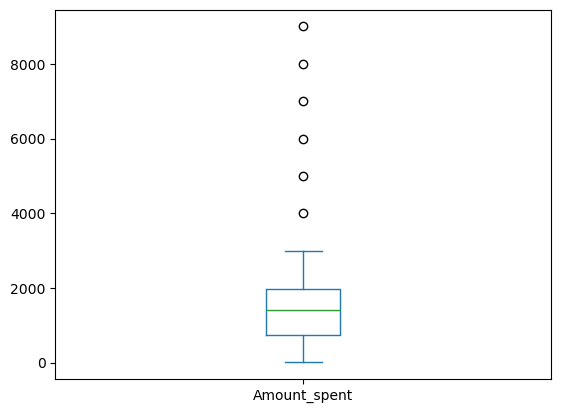

In [45]:
df.plot(y=['Amount_spent'], kind='box');

In [46]:
df = df.drop(df[df.Amount_spent > 3000].index)

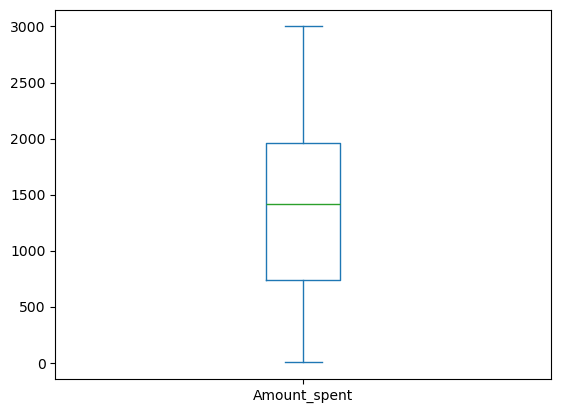

In [47]:
df.plot(y=['Amount_spent'], kind='box');

## Boxplot - Bivariate

In [53]:
import matplotlib.pyplot as plt
import numpy as np

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
fig, ax = plt.subplots(figsize=(6,6))

df.boxplot(by ='Employees_status', column =['Amount_spent'],ax=ax, grid = False);


AttributeError: module 'numpy' has no attribute 'warnings'

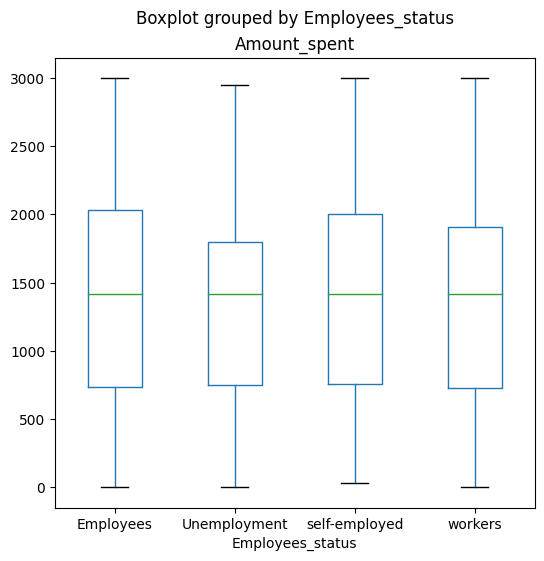

In [147]:
import matplotlib.pyplot as plt
import numpy as np

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
fig, ax = plt.subplots(figsize=(6,6))

df.boxplot(by ='Employees_status', column =['Amount_spent'],ax=ax, grid = False);
